# LIBRARY

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import linalg, sparse
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
os.getcwd()

'/Users/rahim/OneDrive - Office 365/Lab/Datascience/Notebook'

# GETTING DATASETS

In [10]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death     = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

confirmed = pd.read_csv(url_confirmed,sep=',').fillna("NA")
death     = pd.read_csv(url_death,sep=',').fillna("NA")
recovered = pd.read_csv(url_recovered,sep=',').fillna("NA")

# FIRST CLEANNING

## FILTERING BY COUNTRY 
filter_country    = 'France'
filter_province   = 'NA'
country_confirmed = confirmed[(confirmed['Country/Region']==filter_country)&(confirmed['Province/State']==filter_province)].T.iloc[4:,0]
country_death     = death[(death['Country/Region']==filter_country)&(death['Province/State']==filter_province)].T.iloc[4:,0]
recovered         = recovered[(recovered['Country/Region']==filter_country)&(recovered['Province/State']==filter_province)].T.iloc[4:,0]

## MERGE ALL DATA
d = {'Confirmed' : country_confirmed,
     'Death'     : country_death,
     'Recovered' : recovered,
     }
data_country = pd.DataFrame(data=d,dtype=np.float)

## GENERATE DATETIME VALUES
data_country['Datetime'] = pd.to_datetime(data_country.index)                         
data_country = data_country.sort_values(by='Datetime')

## LAST CLEANNING TASK
new_rowname                   = list(range(1, data_country.shape[0]+1))
data_country.index            = new_rowname
#data_country['log_confirmed'] = np.log(data_country.Confirmed+1)
#data_country["log_death"]     = np.log(data_country.Death+1)
#data_country["log_recovered"] = np.log(data_country.Recovered+1)


## COUNTRY LIST
path         = 'D:\OneDrive - Office 365\Lab\Datasets\\'
list_country = confirmed.iloc[:,0:2]
list_country.to_excel(path+'list_country_covid.xlsx', sheet_name='Sheet1')

## BACKUP
data_country_bkup = data_country

## TEST
data_country.head()

,Confirmed,Death,Recovered,Datetime
1,0.0,0.0,0.0,2020-01-22
2,0.0,0.0,0.0,2020-01-23
3,2.0,0.0,0.0,2020-01-24
4,3.0,0.0,0.0,2020-01-25
5,3.0,0.0,0.0,2020-01-26


### EXPORT TO EXCEL

In [ ]:
## EXPORT TO EXCEL
path     = 'D:\OneDrive - Office 365\Lab\Datasets\\'
filename = 'mdg_covid.xlsx'
data_country.to_excel(path+filename, sheet_name='Sheet1')

# DATA VISUALISATION

Text(0.5, 1.0, 'Evolution of Covid-19 in France')

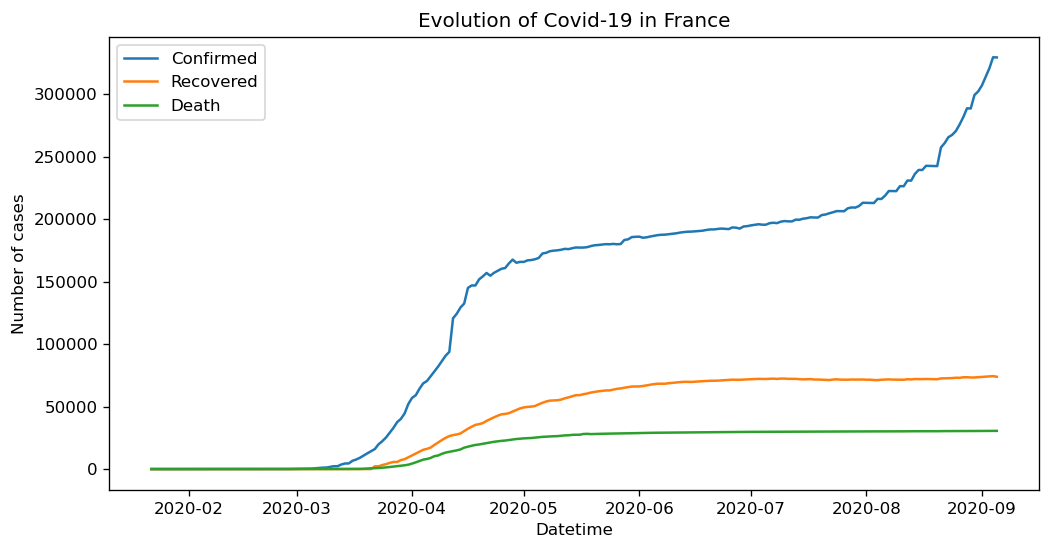

In [11]:
plt.plot(data_country.Datetime,data_country.Confirmed,label="Confirmed")
plt.plot(data_country.Datetime,data_country.Recovered,label="Recovered")
plt.plot(data_country.Datetime,data_country.Death,label="Death")
plt.legend()
plt.xlabel("Datetime")
plt.ylabel("Number of cases")

if filter_province == 'NA':
    title_country = filter_country
else:
    title_country = filter_province
plt.title('Evolution of Covid-19 in '+title_country)

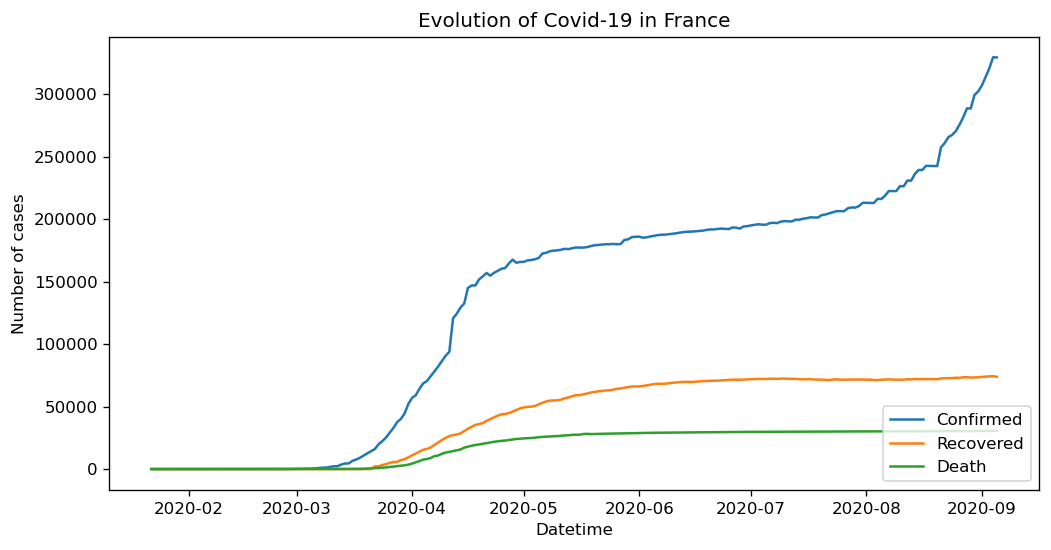

In [12]:
fig = plt.figure()
plt.plot(data_country.Datetime,data_country.Confirmed,label="Confirmed")
plt.plot(data_country.Datetime,data_country.Recovered,label="Recovered")
plt.plot(data_country.Datetime,data_country.Death,label="Death")
plt.legend()
plt.xlabel("Datetime")
plt.ylabel("Number of cases")

if filter_province == 'NA':
    title_country = filter_country
else:
    title_country = filter_province
plt.title('Evolution of Covid-19 in '+title_country)
plt.legend(loc='lower right')

# TIME SERIES ANALYSIS

In [13]:
## LAG VARIABLE, DIFF_RATE AND LOGARITHM VARIABLE
variable = ["Confirmed","Death","Recovered"]
new_var0 = "log_"
new_var1 = "diff_"
new_var2 = "diff_log_"
for step in variable:
    # Log
    epsilon = 1
    data_country[new_var0+step] =  np.log(data_country[step] + epsilon)
    # Diff
    data_country[new_var1+step] =  data_country[step].diff()
    data_country[new_var1+step] =  data_country[new_var1+step].fillna(0)
    # Diff Log
    data_country[new_var2+step] =  data_country[new_var0+step].diff()
    data_country[new_var2+step] =  data_country[new_var2+step].fillna(0)
    
    
data_country.head()

,Confirmed,Death,Recovered,Datetime,log_Confirmed,diff_Confirmed,diff_log_Confirmed,log_Death,diff_Death,diff_log_Death,log_Recovered,diff_Recovered,diff_log_Recovered
1,0.0,0.0,0.0,2020-01-22,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,2020-01-23,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,2020-01-24,1.098612,2.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,2020-01-25,1.386294,1.0,0.287682,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0.0,2020-01-26,1.386294,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## PLOT DIFF

Text(0.5, 1.0, 'Evolution of Covid-19 in France')

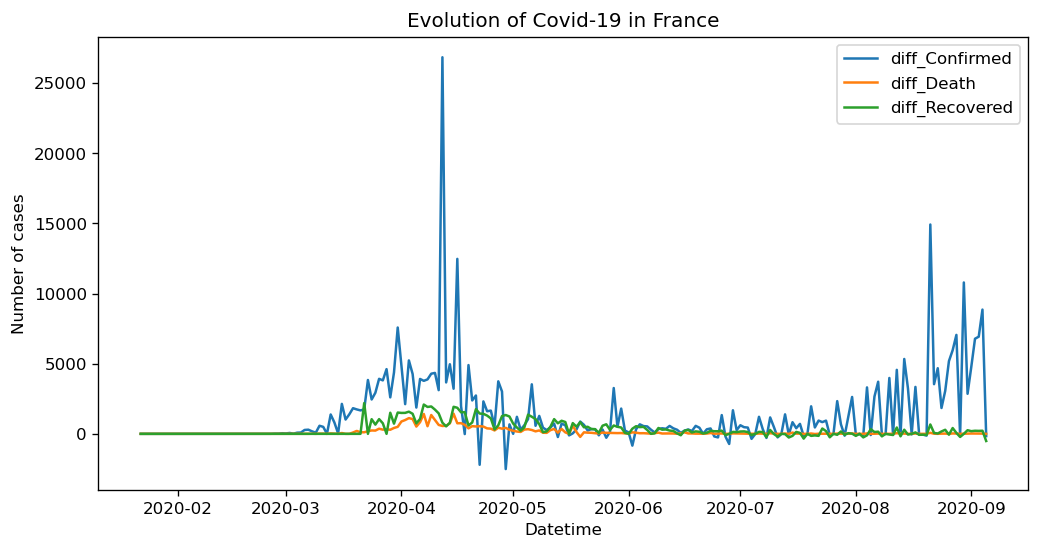

In [14]:
for step in variable:
    plt.plot(data_country.Datetime,data_country[new_var1+step],label=new_var1+step)
plt.legend()
plt.xlabel("Datetime")
plt.ylabel("Number of cases")

if filter_province == 'NA':
    title_country = filter_country
else:
    title_country = filter_province
plt.title('Evolution of Covid-19 in '+title_country)

##  SLICED DATA BY DATETIME

In [8]:
# SLICE DATA BY DATETIME
value_datetime = '2020-03-15'
slice_index = list(range(data_country[data_country["Datetime"] == value_datetime].index.values[0],data_country.shape[0]))

## PLOT LOGARITHM VARIABLE

Text(0.5, 1.0, 'Evolution of Covid-19 in Madagascar')

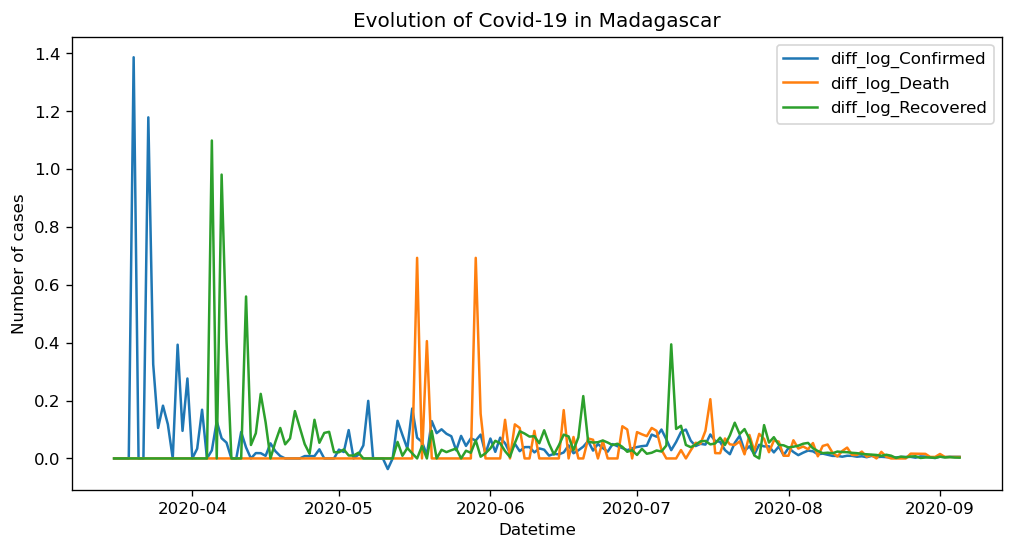

In [9]:

variable = ["Confirmed","Death","Recovered"]
var = variable
new_var0 = "log_"
new_var1 = "diff_"
new_var2 = "diff_log_"

for i in range(0,3):
    var[i] = new_var2 + var[i]
    
for step in var:
    plt.plot(data_country.iloc[slice_index,:].Datetime,data_country.iloc[slice_index,:][step],label=step)
plt.legend()
plt.xlabel("Datetime")
plt.ylabel("Number of cases")


if filter_province == 'NA':
    title_country = filter_country
else:
    title_country = filter_province
plt.title('Evolution of Covid-19 in '+title_country)